In [1]:
import numpy as np
from skimage import io
from veg_index import Image_Multi
import matplotlib.pyplot as plt
from matplotlib import path
import georasters as gr

def aux_index(Im):
    Im.raster = Im.raster[0, :, :]
    Im.shape = Im.raster.shape
    return Im

def ImRGBN2Split(ImRGBN, indx):
    proj = ImRGBN.projection
    nodata = ImRGBN.nodata_value
    datatype = ImRGBN.datatype
    geot = ImRGBN.geot
    return gr.GeoRaster(ImRGBN.raster[indx, :, :], geot, nodata, proj, datatype)
            

/home/dlsaavedra/anaconda3/envs/new/lib/python3.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [2]:
#path_im = 'Caso2/banano_rgb_1.tif'
path_im = 'Caso2/banano_rgbn_1.tif'

ImRGBN = gr.from_file(path_im)
ImRGBN.shape

(4, 7429, 4985)

In [3]:
im_multi = Image_Multi()
im_multi.load_images(im_red = ImRGBN2Split(ImRGBN, 0), im_green = ImRGBN2Split(ImRGBN, 1), 
                     im_blue = ImRGBN2Split(ImRGBN, 2),im_nir = ImRGBN2Split(ImRGBN, 3), 
                     im_rededge = ImRGBN2Split(ImRGBN, 3))

#Nir = Rededge

In [11]:
print(ImRGBN.min())
print(im_multi.im_red.min())
print(im_multi.im_green.min())
print(im_multi.im_blue.min())
print(im_multi.im_nir.min())


0
0
0
0
33


Text(0.5, 1.05, 'RedEdge Band')

<Figure size 1080x1080 with 0 Axes>

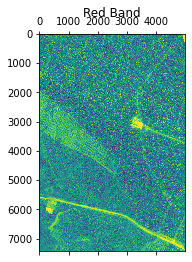

<Figure size 1080x1080 with 0 Axes>

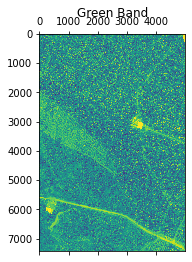

<Figure size 1080x1080 with 0 Axes>

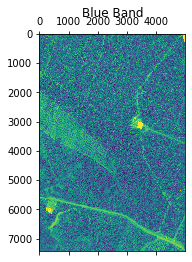

<Figure size 1080x1080 with 0 Axes>

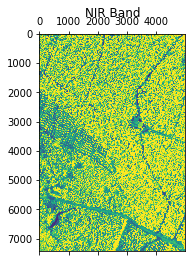

<Figure size 1080x1080 with 0 Axes>

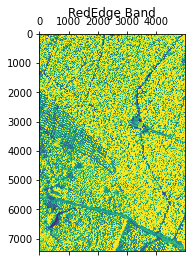

In [5]:
plt.figure(figsize=(15, 15))
im_multi.im_red.plot()
plt.title('Red Band')


plt.figure(figsize=(15, 15))
im_multi.im_green.plot()
plt.title('Green Band')


plt.figure(figsize=(15, 15))
im_multi.im_blue.plot()
plt.title('Blue Band')



plt.figure(figsize=(15, 15))
im_multi.im_nir.plot()
plt.title('NIR Band')



plt.figure(figsize=(15, 15))
im_multi.im_rededge.plot()
plt.title('RedEdge Band')



Text(0.5, 1.0, 'OSAVI')

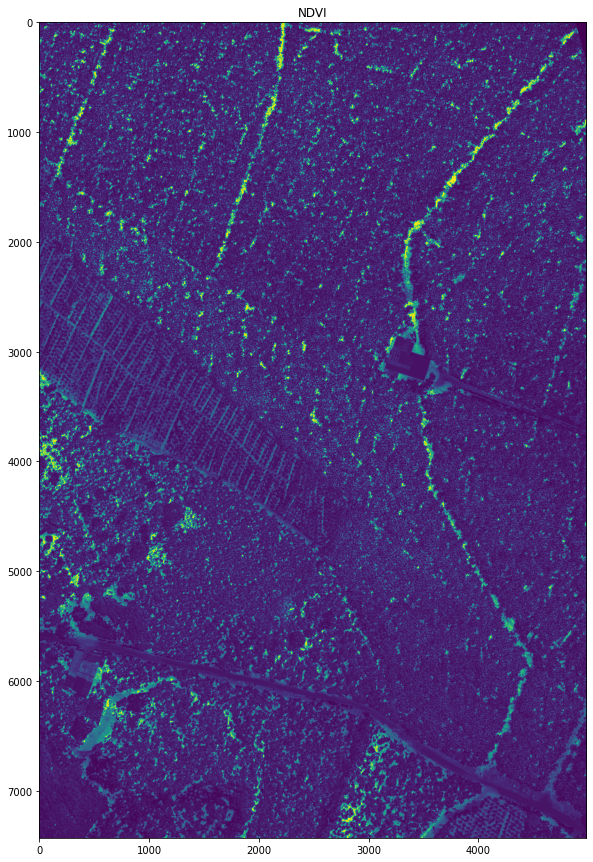

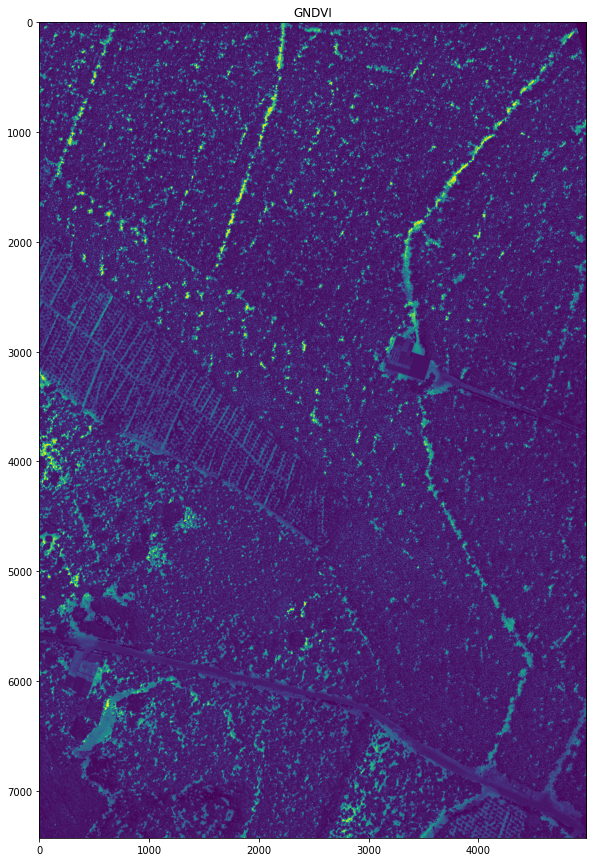

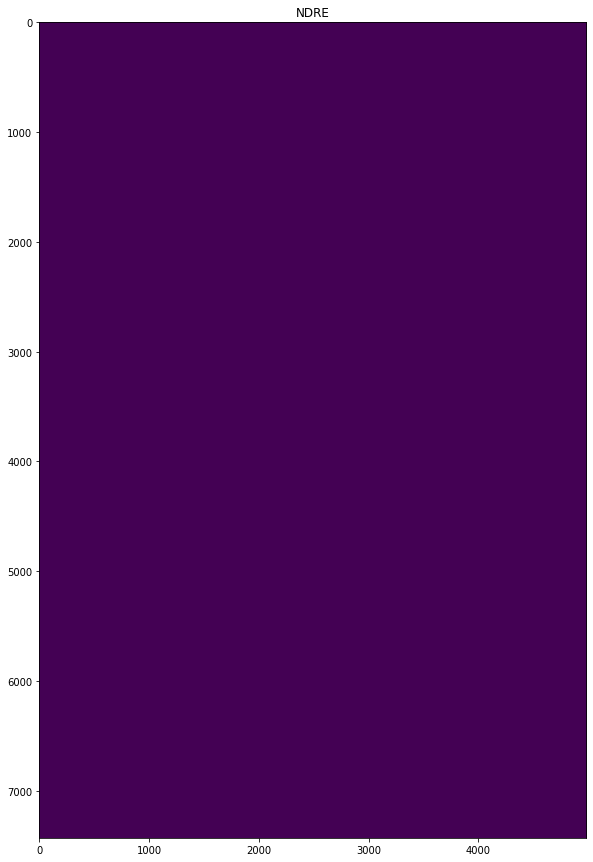

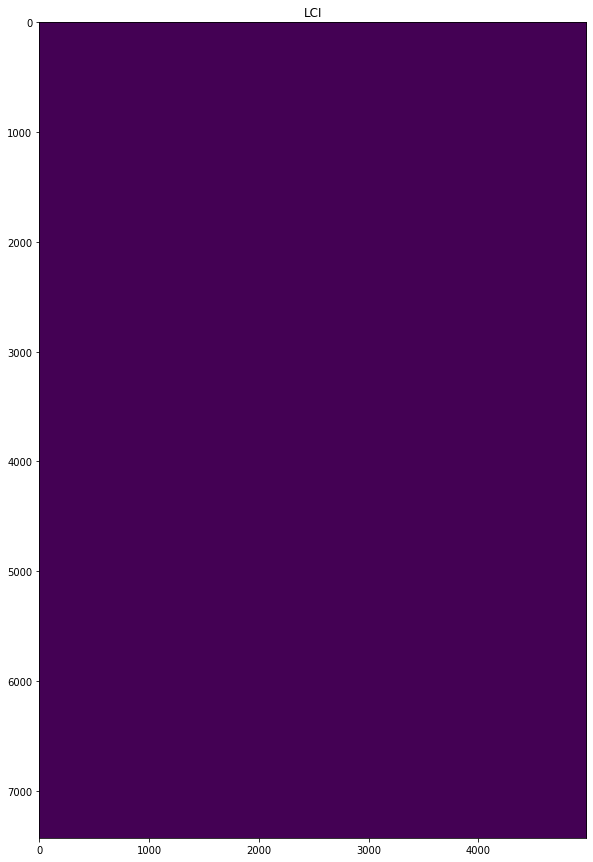

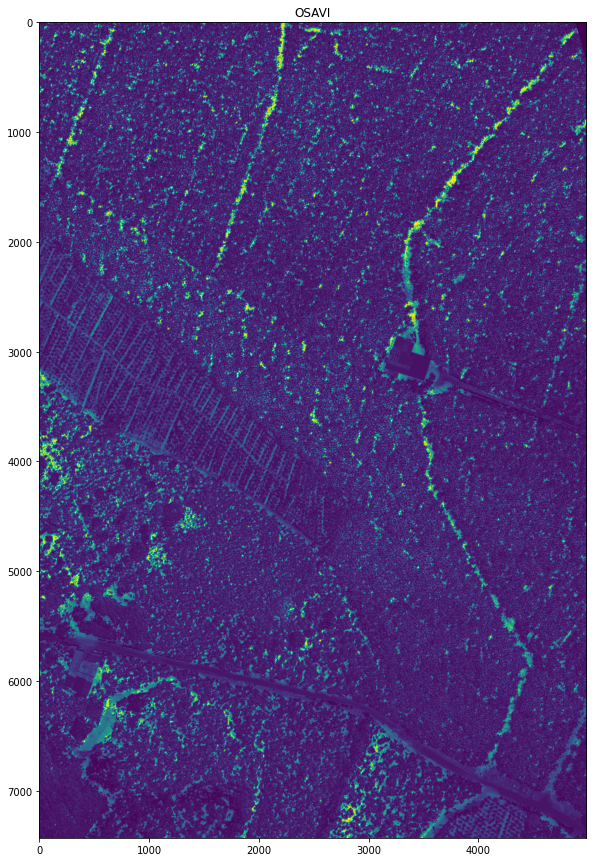

In [46]:
plt.figure(figsize=(15, 15))
aux =im_multi.NDVI().raster
aux[aux>20] = 20
plt.imshow(aux)
plt.title('NDVI')

plt.figure(figsize=(15, 15))
aux =im_multi.GNDVI().raster
aux[aux>20] = 20
plt.imshow(aux)
plt.title('GNDVI')

plt.figure(figsize=(15, 15))
aux =im_multi.NDRE().raster
aux[aux>20] = 20
plt.imshow(aux)
plt.title('NDRE')

plt.figure(figsize=(15, 15))
aux =im_multi.LCI().raster
aux[aux>20] = 20
plt.imshow(aux)
plt.title('LCI')

plt.figure(figsize=(15, 15))
aux =im_multi.OSAVI().raster
aux[aux>20] = 20
plt.imshow(aux)
plt.title('OSAVI')

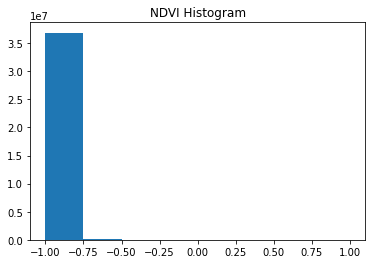

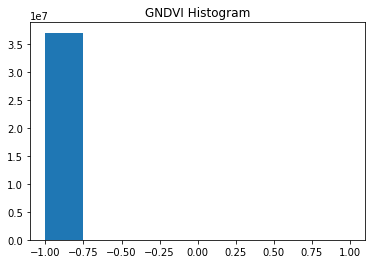

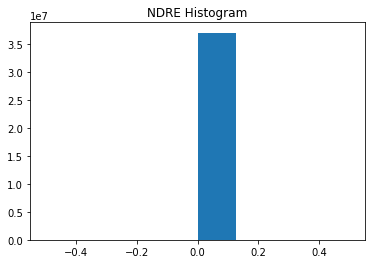

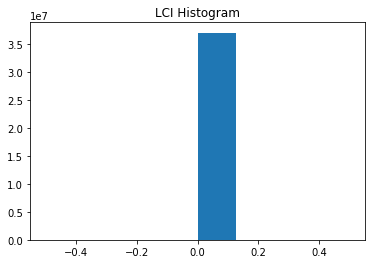

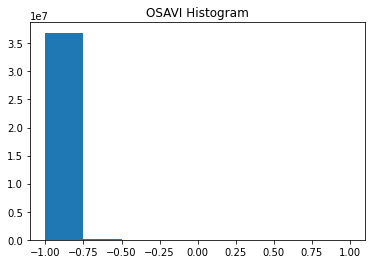

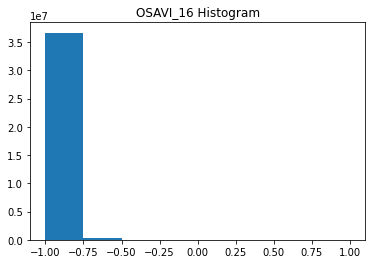

In [9]:
n_bins = 8

plt.figure(1)
NDVI_raster = im_multi.NDVI().raster
NDVI_raster[NDVI_raster > 255] = 255
NDVI_raster = 2. * (NDVI_raster - np.ma.min(NDVI_raster)) / np.ma.ptp(NDVI_raster) - 1
plt.hist(NDVI_raster[~np.isnan(NDVI_raster)], bins = n_bins)
plt.title('NDVI Histogram')
#plt.savefig('Barrack A/NDVI_Histogram_'+ str(n_bins))

plt.figure(2)
GNDVI_raster = im_multi.GNDVI().raster
GNDVI_raster[GNDVI_raster > 255] = 255
GNDVI_raster = 2. * (GNDVI_raster - np.ma.min(GNDVI_raster)) / np.ma.ptp(GNDVI_raster) - 1
plt.hist(GNDVI_raster[~np.isnan(GNDVI_raster)], bins = n_bins)
plt.title('GNDVI Histogram')
#plt.savefig('Barrack A/GNDVI_Histogram_'+ str(n_bins))

plt.figure(3)
NDRE_raster = im_multi.NDRE().raster
NDRE_raster[NDRE_raster > 255] = 255
NDRE_raster = 2. * (NDRE_raster - np.ma.min(NDRE_raster)) / np.ma.ptp(NDRE_raster) - 1
plt.hist(NDRE_raster[~np.isnan(NDRE_raster)], bins = n_bins)
plt.title('NDRE Histogram')
#plt.savefig('Barrack A/NDRE_Histogram_'+ str(n_bins))

plt.figure(4)
LCI_raster = im_multi.LCI().raster
LCI_raster[LCI_raster > 255] = 255
LCI_raster = 2. * (LCI_raster - np.ma.min(LCI_raster)) / np.ma.ptp(LCI_raster) - 1
plt.hist(LCI_raster[~np.isnan(LCI_raster)], bins = n_bins)
plt.title('LCI Histogram')
#plt.savefig('Barrack A/LCI_Histogram_'+ str(n_bins))

plt.figure(5)
OSAVI_raster = im_multi.OSAVI().raster
OSAVI_raster[OSAVI_raster > 255] = 255
OSAVI_raster = 2. * (OSAVI_raster - np.ma.min(OSAVI_raster)) / np.ma.ptp(OSAVI_raster) - 1
plt.hist(OSAVI_raster[~np.isnan(OSAVI_raster)], bins = n_bins)
plt.title('OSAVI Histogram')
#plt.savefig('Barrack A/OSAVI_Histogram_'+ str(n_bins))

plt.figure(6)
OSAVI_raster = im_multi.OSAVI_16().raster
OSAVI_raster[OSAVI_raster > 255] = 255
OSAVI_raster = 2. * (OSAVI_raster - np.ma.min(OSAVI_raster)) / np.ma.ptp(OSAVI_raster) - 1
plt.hist(OSAVI_raster[~np.isnan(OSAVI_raster)], bins = n_bins)
plt.title('OSAVI_16 Histogram')
#plt.savefig('Barrack A/OSAVI_16_Histogram_'+ str(n_bins))

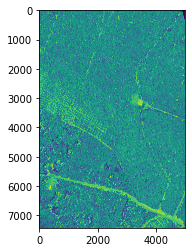

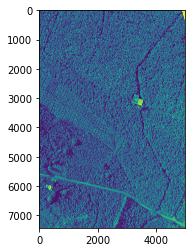

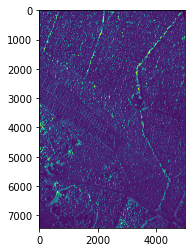

In [45]:
RED = im_multi.im_red.raster
NIR = im_multi.im_nir.raster
A1 = NIR-RED
A2 = NIR+RED 
NDVI = A1/(A2 + .01)
NDVI[NDVI>20] = 20
plt.figure(1)
plt.imshow(A1)

plt.figure(2)
plt.imshow(A2)

plt.figure(3)
plt.imshow(NDVI)



(array([3.2602862e+07, 2.8469290e+06, 9.1132700e+05, 3.1467900e+05,
        1.2955400e+05, 6.1894000e+04, 3.7282000e+04, 2.3067000e+04,
        1.4802000e+04, 1.2854000e+04, 6.5570000e+03, 6.8710000e+03,
        5.5280000e+03, 3.9980000e+03, 3.3770000e+03, 2.6200000e+03,
        2.8520000e+03, 1.8040000e+03, 1.7940000e+03, 2.4700000e+03,
        1.6240000e+03, 1.8340000e+03, 1.5600000e+03, 1.3540000e+03,
        1.6000000e+03, 2.4100000e+02, 3.5900000e+02, 1.7200000e+02,
        3.1700000e+02, 4.0600000e+02, 2.6000000e+02, 5.0100000e+02,
        3.6300000e+02, 5.9600000e+02, 4.8100000e+02, 8.2500000e+02,
        6.2700000e+02, 7.6700000e+02, 6.4700000e+02, 4.2600000e+02,
        9.2400000e+02, 6.4500000e+02, 8.3600000e+02, 4.5100000e+02,
        6.2600000e+02, 3.6800000e+02, 5.4900000e+02, 5.6000000e+02,
        3.3300000e+02, 2.0192000e+04]),
 array([  0. ,   5.1,  10.2,  15.3,  20.4,  25.5,  30.6,  35.7,  40.8,
         45.9,  51. ,  56.1,  61.2,  66.3,  71.4,  76.5,  81.6,  86.7,
  

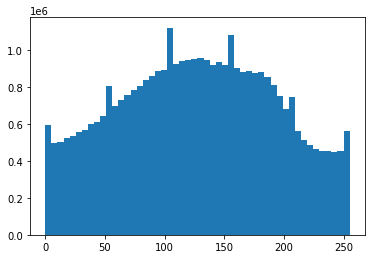

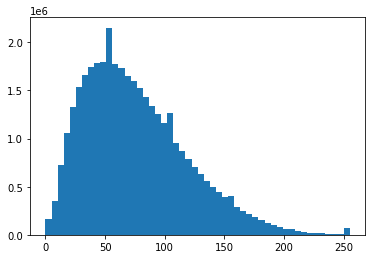

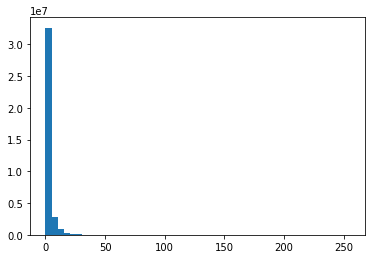

In [34]:
n_bins = 50
plt.figure(2)
NDVI_raster = (NIR-RED)#/(NIR+RED+ 0.001)
#NDVI_raster[NDVI_raster > 255] = 255
#NDVI_raster = 2. * (NDVI_raster - np.ma.min(NDVI_raster)) / np.ma.ptp(NDVI_raster) - 1
plt.hist(NDVI_raster[~np.isnan(NDVI_raster)], bins = n_bins)

plt.figure(3)
NDVI_raster = (NIR+RED)#/(NIR+RED+ 0.001)
#NDVI_raster[NDVI_raster > 255] = 255
#NDVI_raster = 2. * (NDVI_raster - np.ma.min(NDVI_raster)) / np.ma.ptp(NDVI_raster) - 1
plt.hist(NDVI_raster[~np.isnan(NDVI_raster)], bins = n_bins)

plt.figure(4)
NDVI_raster = np.uint8(NIR-RED)/(NIR+RED+ 0.001)
NDVI_raster[NDVI_raster > 255] = 255
#NDVI_raster = 2. * (NDVI_raster - np.ma.min(NDVI_raster)) / np.ma.ptp(NDVI_raster) - 1
plt.hist(NDVI_raster[~np.isnan(NDVI_raster)], bins = n_bins)

In [30]:
(NIR+RED).max()

255